**Kimlik Doğrulama**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


**Lokalizasyon (Yerelleştirme) İşlemi**

In [ ]:
!mkdir -p drive
!ls

drive  sample_data


**Dosya Yerini Belirleme İşlemi**

In [ ]:
import os
os.chdir("/content/drive/MyDrive/DDI")
!pwd


/content/drive/MyDrive/DDI


**Gerekli Kütüphanelerin Yüklenmesi**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from warnings import filterwarnings
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from textblob import Word, TextBlob
from wordcloud import WordCloud
#!pip install xgboost
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from warnings import filterwarnings
filterwarnings('ignore')

**Verilerin Yüklenmesi**

In [ ]:
verisetiDf=pd.read_csv("/content/drive/MyDrive/DDI/Final/magaza_yorumlari_duygu_analizi.csv", encoding="utf-16")
print(verisetiDf.shape)

(11429, 2)


In [ ]:
verisetiDf.head(5)

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [ ]:
print(verisetiDf.columns)

Index(['Görüş', 'Durum'], dtype='object')


In [ ]:
verisetiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429 entries, 0 to 11428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11429 non-null  object
dtypes: object(2)
memory usage: 178.7+ KB


In [ ]:
verisetiDf1Preprocessing = pd.DataFrame()
verisetiDf2Preprocessing = pd.DataFrame()
verisetiDf1Preprocessing["Gorus"] = verisetiDf["Görüş"]

verisetiDf2Preprocessing["Durumu"] = verisetiDf['Durum']


In [ ]:
verisetiDf1Preprocessing['Gorus']


0        ses kalitesi ve ergonomisi rezalet, sony olduğ...
1                               hizli teslimat tesekkürler
2        ses olayı süper....gece çalıştır sıkıntı yok.....
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        Kulaklığın sesi kaliteli falan değil. Aleti öv...
                               ...                        
11424          biraz fazla ısınıyor ama sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...
11427    Bir sene olmadı ayar düğmesine basıyorum ekran...
11428    Urun kaliteli zamaninda tedlimat ve kullanisli...
Name: Gorus, Length: 11429, dtype: object

In [ ]:
verisetiDf2Preprocessing["Durumu"]


0         Olumsuz
1        Tarafsız
2          Olumlu
3         Olumsuz
4         Olumsuz
           ...   
11424    Tarafsız
11425    Tarafsız
11426     Olumsuz
11427    Tarafsız
11428      Olumlu
Name: Durumu, Length: 11429, dtype: object

Büyük-Küçük Harf Dönüşümü

In [ ]:
verisetiDf1Preprocessing['Gorus'] = verisetiDf1Preprocessing['Gorus'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"])

**Noktalama İşaretlerinin Silinmesi**

In [ ]:
verisetiDf1Preprocessing['Gorus'] = verisetiDf1Preprocessing['Gorus'].str.replace('[^\w\s]','')
verisetiDf1Preprocessing.head(5)

,Gorus
0,ses kalitesi ve ergonomisi rezalet sony olduğu...
1,hizli teslimat tesekkürler
2,ses olayı süpergece çalıştır sıkıntı yokkablo ...
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...
4,kulaklığın sesi kaliteli falan değil aleti öve...


**Etkisiz Kelimelerin (Stop Words) Silinmesi**

In [ ]:
print(type(verisetiDf1Preprocessing)) #<class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>


In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"])
#Sayıların silinmesi esnasında Series olan Verisetini tekrardan DataFrame'e dönüştürür
print(type(verisetiDf1Preprocessing)) #<class 'pandas.core.frame.DataFrame'>
verisetiDf1Preprocessing.head(5)

<class 'pandas.core.frame.DataFrame'>


,Gorus
0,ses kalitesi ve ergonomisi rezalet sony olduğu...
1,hizli teslimat tesekkürler
2,ses olayı süpergece çalıştır sıkıntı yokkablo ...
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...
4,kulaklığın sesi kaliteli falan değil aleti öve...


In [ ]:
import nltk
nltk.download("stopwords") #nltk kütüphanesinden stopwords’leri indirir
from nltk.corpus import stopwords # nltk.corpus kütüphanesinden stopwords fonksiyonunu getirir
swTr = stopwords.words("turkish")+['bir','biri','s'] #İngiliz diline ait stopwords'ler alınır
print(swTr) #['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', ...
verisetiDf1Preprocessing = verisetiDf1Preprocessing["Gorus"].apply(lambda x: " ".join(x for x in x.split() if x not in swTr))
#if x not in swEng #swEng içinde olmayanlar birleştirilerek veriseti elde edilir
verisetiDf1Preprocessing.head(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'bir', 'biri', 's']


0    ses kalitesi ergonomisi rezalet sony olduğu al...
1                           hizli teslimat tesekkürler
2    ses olayı süpergece çalıştır sıkıntı yokkablo ...
3    geldi bigün kullandık hemen bozoldu hiçtavsiye...
4    kulaklığın sesi kaliteli falan değil aleti öve...
Name: Gorus, dtype: object



**Az Geçen Kelimelerin Silinmesi:**







In [ ]:

kelimeSayilari = pd.Series(" ".join(verisetiDf1Preprocessing).split()).value_counts() #Metinde her kelimenin kaç defa geçtiğini verir
print(kelimeSayilari)
silinecekler = pd.Series(" ".join(verisetiDf1Preprocessing).split()).value_counts()[-505:] #En az geçen son 50 kelimeyi alır
print(silinecekler)
print(type(verisetiDf1Preprocessing)) #<class 'pandas.core.series.Series'>
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"]) #Verisetini tekrardan DataFrame'e dönüştürür
verisetiDf1Preprocessing = verisetiDf1Preprocessing["Gorus"].apply(lambda x: " ".join(i for i in x.split() if i not in silinecekler))
#Veri silme yapmayacağımıziçin Asıl değişkenimizin içeriği değişmesin diye verisetiDf1Preprocessing2 isminde farklı bir değişkene atayarak sadece gösterim yapıldı
print(verisetiDf1Preprocessing)


ürün            3881
iyi             2308
güzel           2002
tavsiye         1294
yok             1237
                ... 
rakamları          1
100150200250       1
çevirilen          1
ayarlanan          1
tedlimat           1
Length: 37185, dtype: int64
kalmıyorözelliklerine    1
hakkımın                 1
aklıma                   1
takıntılıysanız          1
avutuyorum               1
                        ..
rakamları                1
100150200250             1
çevirilen                1
ayarlanan                1
tedlimat                 1
Length: 505, dtype: int64
<class 'pandas.core.series.Series'>
0        ses kalitesi ergonomisi rezalet sony olduğu al...
1                               hizli teslimat tesekkürler
2        ses olayı süpergece çalıştır sıkıntı yokkablo ...
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        kulaklığın sesi kaliteli falan değil aleti öve...
                               ...                        
11424              biraz faz

In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"]) #Verisetini tekrardan DataFrame'e dönüştürür

**Kelime Köküne İnme (Lemmatization):**

In [ ]:
import nltk
from textblob import Word
nltk.download("wordnet")
verisetiDf1Preprocessing = verisetiDf1Preprocessing["Gorus"].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))
print(verisetiDf1Preprocessing)

#metin=verisetiDf1Preprocessing["Gorus"]
#from snowballstemmer import TurkishStemmer
#snowBallStememr = TurkishStemmer()
#def kelime_kök_alma(metin):
 #   wordlist = nltk.word_tokenize(metin)
  #  stemWords = [snowBallStememr.stemWord(kelime) for kelime in wordlist]
   # return " ".join(stemWords)
#print(metin)


[nltk_data] Downloading package wordnet to /root/nltk_data...


0        s kalitesi ergonomisi rezalet sony olduğu aldı...
1                               hizli teslimat tesekkürler
2        s olayı süpergece çalıştır sıkıntı yokkablo uz...
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        kulaklığın sesi kaliteli falan değil aleti öve...
                               ...                        
11424              biraz fazla ısınıyor sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    cihazı 1 yıldır kullanıyorum cihazı beğenerek ...
11427    sene olmadı ayar düğmesine basıyorum ekran gid...
11428    urun kaliteli zamaninda kullanisli köpüğü bol ...
Name: Gorus, Length: 11429, dtype: object


In [ ]:
verisetiDf1Preprocessing = pd.DataFrame(verisetiDf1Preprocessing, columns = ["Gorus"])
 #Verisetini tekrardan DataFrame'e dönüştürür

In [ ]:
verisetiDf2Preprocessing = pd.DataFrame(verisetiDf2Preprocessing, columns = ["Durumu"])

**Verisetini Eğitim-Test Veri Kümesine Bölme**

In [ ]:

train_x, test_x, train_y, test_y = model_selection.train_test_split(verisetiDf1Preprocessing["Gorus"],
verisetiDf2Preprocessing["Durumu"],
random_state = 2) #Ifade:Bağımlı, DuyguEtiketi:Bağımsız Değişken

**Öznitelik Çıkarımı**

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
HashingVector = HashingVectorizer(input='content', n_features=10000,norm=None,alternate_sign=False)
HashingVector.fit(train_x)
x_train_HashingVector = HashingVector.transform(train_x)
x_test_HashingVector = HashingVector.transform(test_x)


In [ ]:
#Count Vectorizer
countVector = CountVectorizer()
countVector.fit(train_x)
x_train_countVector = countVector.transform(train_x)
x_test_countVektor = countVector.transform(test_x)
print(countVector.get_feature_names_out()[0:5]) #['abandoned', 'abel', 'abhorrent', 'able', 'aborted']
print(x_train_countVector.toarray()) #Integer sayılar


['0000' '000000' '01032020' '0112' '03']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#TF-IDF "1. Word Level"
tfIdf1WordVector = TfidfVectorizer()
tfIdf1WordVector.fit(train_x)
x_train_tfIdf1WordVector = tfIdf1WordVector.transform(train_x)
x_test_tfIdf1WordVector = tfIdf1WordVector.transform(test_x)
print(tfIdf1WordVector.get_feature_names_out()[0:5]) #['abandoned', 'abel', 'able', 'aborted', 'absolute']
print(x_train_tfIdf1WordVector.toarray()) #Float sayılar

['0000' '000000' '01032020' '0112' '03']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#TF-IDF "2. N-Gram Level"
tfIdf2NgramVector = TfidfVectorizer(ngram_range=(2,3)) #2 ve 3 kelimelik gruplar oluştur
tfIdf2NgramVector.fit(train_x)
x_train_tfIdf2NgramVector = tfIdf2NgramVector.transform(train_x)
x_test_tfIdf2NgramVector = tfIdf2NgramVector.transform(test_x)
print(tfIdf2NgramVector.get_feature_names_out()[0:5]) #['abandoned still', 'abandoned still consoled', 'abel ferrara', 'abel ferrara beaten', 'able create']
print(x_train_tfIdf2NgramVector.toarray()) #Float sayılar

['0000 gözüküyor' '0000 gözüküyor tekrar' '01032020 medium'
 '01032020 medium marktan' '0112 tarihinde']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#TF-IDF "3. Character Level"
tfIdf3CharVector = TfidfVectorizer(analyzer ="char", ngram_range=(2,3))
tfIdf3CharVector.fit(train_x)
x_train_tfIdf3CharVector = tfIdf3CharVector.transform(train_x)
x_test_tfIdf3CharVector = tfIdf3CharVector.transform(test_x)
print(tfIdf3CharVector.get_feature_names_out()[0:5]) #[' a', ' ab', ' ac', ' ad', ' af']
print(x_train_tfIdf3CharVector.toarray()) #Float sayılar

[' 0' ' 0 ' ' 00' ' 01' ' 03']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

# Terim Frekansı
verisetiDf1Feature = verisetiDf1Preprocessing.copy()
#Terim Frekansı
tf1 = (verisetiDf1Feature["Gorus"]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf1.columns = ["Kelimeler", "Terim Frekansı"]
tf1.head()
tf1.info()
tf1.nunique()
#Bar Plot (Çubuk Grafik)
ciz = tfIdf1WordVector[tfIdf1WordVector["Terim Frekansı"] > 200] #Terim Frekansı değeri 200'den büyük olanları al
ciz.plot.bar(x="Kelimeler", y="Terim Frekansı");

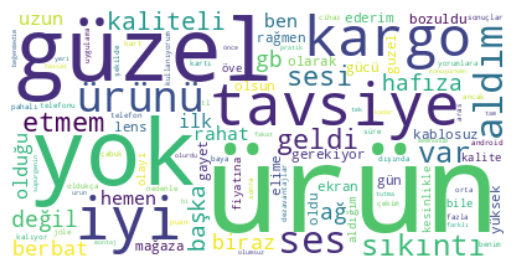

In [ ]:
text = " ".join(i for i in verisetiDf1Preprocessing["Gorus"])
worldcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Lojistik Regresyon ile
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_countVektor, test_y, cv=10).mean()
print("Lojistik Regresyon ile Count Vectors Doğruluk Oranı:", accuracy)
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Lojistik Regresyon ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Lojistik Regresyon ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Lojistik Regresyon ile Char-Level Doğruluk Oranı:", accuracy)


Lojistik Regresyon ile Count Vectors Doğruluk Oranı: 0.6501128695865538
Lojistik Regresyon ile Word-Level TF-IDF Doğruluk Oranı: 0.6721567905778432
Lojistik Regresyon ile N-Gram TF-IDF Doğruluk Oranı: 0.5899227088700774
Lojistik Regresyon ile Char-Level Doğruluk Oranı: 0.6700576616366091


In [ ]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(loj_model, x_test_HashingVector, test_y, cv=10).mean()
print("Naive Bayes ile Hashing Vectors Doğruluk Oranı:", accuracy)

Naive Bayes ile Hashing Vectors Doğruluk Oranı: 0.6480125138019874


In [ ]:
#Naive Bayes ile
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_countVektor, test_y, cv=10).mean()
print("Naive Bayes ile Count Vectors Doğruluk Oranı:", accuracy)
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Naive Bayes ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Naive Bayes ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Naive Bayes ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)


Naive Bayes ile Count Vectors Doğruluk Oranı: 0.6721469758311864
Naive Bayes ile Word-Level TF-IDF Doğruluk Oranı: 0.6564065758802602
Naive Bayes ile N-Gram TF-IDF Doğruluk Oranı: 0.5510967979389031
Naive Bayes ile Char-Level TF-IDF Doğruluk Oranı: 0.6270224512329775


In [ ]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(nb_model, x_test_HashingVector, test_y, cv=10).mean()
print("Naive Bayes ile Hashing Vectors Doğruluk Oranı:", accuracy)

Naive Bayes ile Hashing Vectors Doğruluk Oranı: 0.6550116550116549


In [ ]:
#Random Forest ile
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_countVektor, test_y, cv=10).mean()
print("Random Forest ile Count Vectors Doğruluk Oranı:", accuracy)
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Random Forest ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Random Forest ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Random Forest ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)


Random Forest ile Count Vectors Doğruluk Oranı: 0.6329665071770335
Random Forest ile Word-Level TF-IDF Doğruluk Oranı: 0.6455674150410993
Random Forest ile N-Gram TF-IDF Doğruluk Oranı: 0.5899227088700774
Random Forest ile Char-Level TF-IDF Doğruluk Oranı: 0.6700576616366091


In [ ]:
rf = ensemble.RandomForestClassifier()
rf_model = loj.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(rf_model, x_test_HashingVector, test_y, cv=10).mean()
print("Random Forest ile Hashing vectors Doğruluk Oranı:", accuracy)


Random Forest ile Hashing vectors Doğruluk Oranı: 0.6480125138019874


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt_model = dt.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(dt_model, x_test_countVektor, test_y, cv=10).mean()
print("Random Forest ile Count Vectors Doğruluk Oranı:", accuracy)
dt = ensemble.RandomForestClassifier()
dt_model = dt.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(dt_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Random Forest ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
dt = ensemble.RandomForestClassifier()
dt_model = dt.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(dt_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Random Forest ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
dt = ensemble.RandomForestClassifier()
dt_model = dt.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(dt_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Random Forest ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)

Random Forest ile Count Vectors Doğruluk Oranı: 0.5549552202183781
Random Forest ile Word-Level TF-IDF Doğruluk Oranı: 0.6385560053981106
Random Forest ile N-Gram TF-IDF Doğruluk Oranı: 0.5745344129554656
Random Forest ile Char-Level TF-IDF Doğruluk Oranı: 0.6315629984051037


In [ ]:
dt = ensemble.RandomForestClassifier()
dt_model = dt.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(dt_model, x_test_HashingVector, test_y, cv=10).mean()
print("DecisionTreeClassifier ile Hashing Vectors Doğruluk Oranı:", accuracy)

DecisionTreeClassifier ile Hashing Vectors Doğruluk Oranı: 0.6312231628021101


In [ ]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state = 10)
svm_model = svm.fit(x_train_countVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_countVektor, test_y, cv=10).mean()
print("Random Forest ile Count Vectors Doğruluk Oranı:", accuracy)
svm = ensemble.RandomForestClassifier()
svm_model = svm.fit(x_train_tfIdf1WordVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_tfIdf1WordVector, test_y, cv=10).mean()
print("Random Forest ile Word-Level TF-IDF Doğruluk Oranı:", accuracy)
svm = ensemble.RandomForestClassifier()
svm_model = svm.fit(x_train_tfIdf2NgramVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_tfIdf2NgramVector, test_y, cv=10).mean()
print("Random Forest ile N-Gram TF-IDF Doğruluk Oranı:", accuracy)
svm = ensemble.RandomForestClassifier()
svm_model = svm.fit(x_train_tfIdf3CharVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_tfIdf3CharVector, test_y, cv=10).mean()
print("Random Forest ile Char-Level TF-IDF Doğruluk Oranı:", accuracy)


Random Forest ile Count Vectors Doğruluk Oranı: 0.6273855968592811
Random Forest ile Word-Level TF-IDF Doğruluk Oranı: 0.6389179241810822
Random Forest ile N-Gram TF-IDF Doğruluk Oranı: 0.5790847748742485
Random Forest ile Char-Level TF-IDF Doğruluk Oranı: 0.635761256287572


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state = 10)
svm_model = svm.fit(x_train_HashingVector, train_y)
accuracy = model_selection.cross_val_score(svm_model, x_test_HashingVector, test_y, cv=10).mean()
print("svm ile Hashing Vectors Doğruluk Oranı:", accuracy)


svm ile Hashing Vectors Doğruluk Oranı: 0.6154790823211875
